![IFMG](https://storage.googleapis.com/ifmg/IFMG.png)

---
# Problemas Clássicos da Computação

## Redução de Dimensionalidade

- Professor: Felipe Reis


## Referências

O presente tutorial foi inspirado em:

* Richert, W. and Coelho, L. P. (2013). Building Machine Learning Systems with Python. Ed. Packt Publishing Ltd., 1 edition.
* Marsland, S. (2014). Machine Learning: An Algorithm Perspective. CRC Press, 2 edition.
* https://www.statology.org/linear-discriminant-analysis-in-python/
* https://www.tutorialspoint.com/scikit_learn/scikit_learn_dimensionality_reduction_using_pca.htm


## Bibliotecas Necessárias

As bibliotecas necessárias à execução desse tutorial:
* Numpy: https://numpy.org/
* Matplotlib: https://matplotlib.org/
* Pandas: https://pandas.pydata.org/
* Sciki-Learn: https://scikit-learn.org/

---
## Instalação de Bibliotecas

In [5]:
# Execute essa linha para instalação no Google Colab
# Os pacotes numpy e matplotlib não precisam ser instalados
# Caso esteja usando seu computador pessoal, instale o pacote via linha de comando.

!pip install -U pandas
!pip install -U scikit-learn

Requirement already up-to-date: pandas in /home/ifmg/anaconda3/envs/ifmg/lib/python3.8/site-packages (1.2.3)
     |████████████████████████████████| 24.9 MB 13.7 MB/s eta 0:00:01
     |████████████████████████████████| 303 kB 3.9 MB/s eta 0:00:01


---
## Importação de bibliotecas 

In [6]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.decomposition import PCA, KernelPCA, FastICA, FactorAnalysis
from sklearn.manifold import Isomap

from sklearn.metrics import plot_roc_curve, roc_curve, auc, confusion_matrix
from sklearn.datasets import load_wine, load_boston, load_iris

---
## Funções Úteis

In [7]:
def split_data(x_data, y_data):
    return train_test_split(
            x_data,
            y_data, 
            test_size = 0.3, #percentual do conjunto de treino
            random_state = 10 #seed random, para resultados semelhantes
    )

In [8]:
def imprime_grafico_iris(data, target, targets_names, dt_column1=0, dt_column2=1):
    plt.figure()
    colors = ['red', 'green', 'blue']
    
    for color, i, target_name in zip(colors, [0, 1, 2], targets_names):
        x = data[target == i, dt_column1]
        y = data[target == i, dt_column2]
        
        plt.scatter(x, y, alpha=.8, color=color, label=target_name)

    #adiciona legenda e imprime gráfico
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.show()

---
## Wine e Íris Datasets

A primeira parte to tutorial utilizará a base de dados Iris Dataset (contém informações sobre a flor Íris), disponível nativamente pela biblioteca Scikit Learn.

A segunda parte do tutorial utilizará a base de dados Wine Dataset (contém informação sobre vinhos), disponível nativamente pela biblioteca Scikit Learn.

Informações sobre as bases de dados:
* Iris Dataset: https://sklearn.org/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris
* Wine Dataset: https://sklearn.org/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

### Iris Dataset

In [9]:
#carrega a base de dados
iris = load_iris()

In [10]:
#convert os dados em um dataframe pandas
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

#imprime algumas amostras, para conhecimento da base de dados
print(df['species'])

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']


In [11]:
#define colunas do dataframe
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

#s_length: corresponde ao comprimento da sépala (parte da flor - https://pt.wikipedia.org/wiki/S%C3%A9pala)
#s_width: corresponde à largura da sépala 
#p_length: corresponde ao comprimento da pétala (parte da flor - https://pt.wikipedia.org/wiki/P%C3%A9tala)
#p_width: corresponde à largura da pétala

In [12]:
#imprime algumas informações do início do dataframe
df.head()

,s_length,s_width,p_length,p_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [13]:
#imprime algumas informações do fim do dataframe
df.tail()

,s_length,s_width,p_length,p_width,target,species
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica
149,5.9,3.0,5.1,1.8,2.0,virginica


In [14]:
#imprime todos os targets 
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]



**Imprime gráfico tentando correlacionar o tamanho e largura da sépala com as classes.**

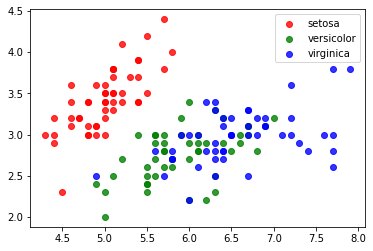

In [11]:
plt.figure()
colors = ['red', 'green', 'blue']

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    #filtra dados da classe i
    dt_class = iris.data[iris.target == i] 
    
    #plota gráfico de dispersão
    plt.scatter(dt_class[:,0], dt_class[:,1], alpha=.8, color=color, label=target_name)

#adiciona legenda e imprime gráfico
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

**Imprime gráfico tentando correlacionar o tamanho e largura da pétala com as classes.**

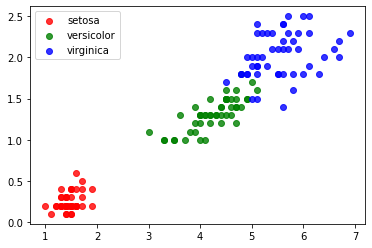

In [19]:
#plota o gráfico (pétalas)
imprime_grafico_iris(iris.data, iris.target, iris.target_names, dt_column1 = 2, dt_column2 = 3) 

#se comentados os últimos dois parâmetros, por padrão, imprime as colunas 0 e 1 (informações de sépalas)
#imprime_grafico_iris(iris.data, iris.target, iris.target_names)

#### Análise de Discriminantes Lineares (LDA)

Podemos utilizar a Análise de Discriminantes Lineares (LDA) para separar as classes.

Observe que o resultado apresenta facilidade em separar a classe "Setosa", mas possui dificuldade em separar as classes "Versicolor" e "Virginica".

Os resultados visuais possuem os mesmos problemas que aqueles visualizados na análise das pétalas (comportamento semelhante). No entanto, o LDA utiliza tanto informação as pétalas quanto das sépalas.

* Referência: https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

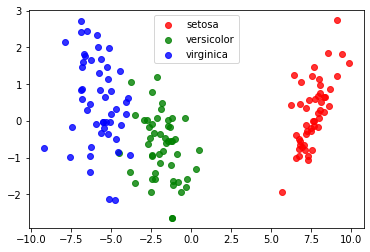

In [27]:
X = iris.data
y = iris.target
lda = LinearDiscriminantAnalysis(n_components=2)
lda_plot = lda.fit(X, y).transform(X)

#plota o gráfico
imprime_grafico_iris(lda_plot, iris.target, iris.target_names)

#### Análise de Componentes Principais (PCA)

Podemos utilizar a Análise de Componentes Principais (PCA) para separar as classes.

Observe que os resultados apresentam os mesmos problemas do LDA (*ao menos em uma análise visual*).

É possível que esse resultado possa ser obtido devido a uma possível falta de separação efetiva das classes (pode não existir forma de separar tipos de flores de Íris somente por pétalas e sépalas - algumas classes se sobrepõe).

* Referência: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

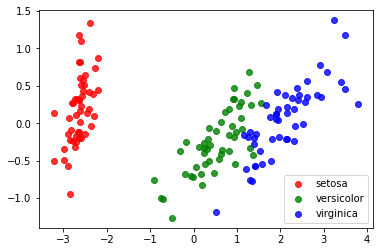

In [14]:
#define data to plot
X = iris.data
y = iris.target
pca = PCA()
pca_plot = pca.fit(X, y).transform(X)

#plota o gráfico
imprime_grafico_iris(pca_plot, iris.target, iris.target_names)

#### Kernel PCA

Podemos utilizar o Kernel PCA para separação de classes, usando o Kernel Sigmoid.

Conforme pode ser visto, o Kernel sigmoid não melhorou o desempenho. Ao contrário, o resultado foi pior que todos os gráficos anteriores. Com isso, podemos perceber que não existe uma solução única adequada a todos os problemas.

* Referência: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html

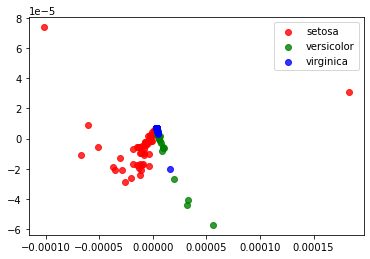

In [28]:
X = iris.data
y = iris.target
kernel = KernelPCA(n_components = 10, kernel = 'sigmoid')
kernel_plot = kernel.fit(X, y).transform(X)

#imprime o gráfico
imprime_grafico_iris(kernel_plot, iris.target, iris.target_names)

Podemos analisar no código abaixo, que dependendo do Kernel utilizado, o resultado do problema é consideravelmente diferente.

Em uma análise visual, podemos perceber inferir que os kernels linear, polinomial e cosseno tiveram o melhor desempenho.

O Kernel Linear é o mesmo do PCA convencional.

kernel = linear


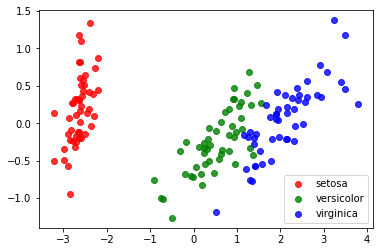

kernel = poly


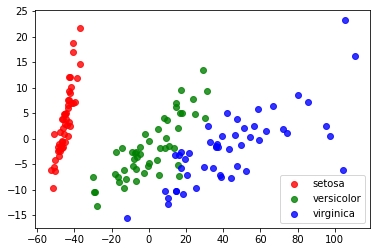

kernel = rbf


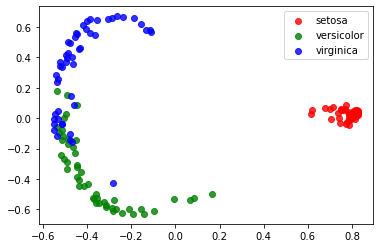

kernel = sigmoid


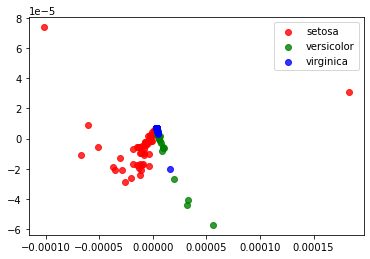

kernel = cosine


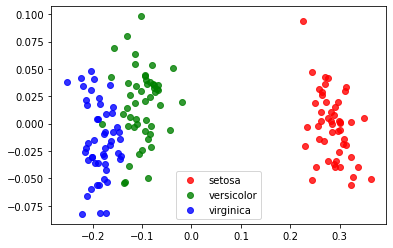

In [41]:
X = iris.data
y = iris.target

for k in ['linear', 'poly', 'rbf', 'sigmoid', 'cosine']:
    kernel = KernelPCA(n_components = 5, kernel = k)
    kernel_plot = kernel.fit(X, y).transform(X)
    
    #plota o gráfico
    print('kernel =', k)
    imprime_grafico_iris(kernel_plot, iris.target, iris.target_names)

#### Análise de Componentes Independentes (ICA)

Podemos utilizar a Análise de Componentes Independentes (ICA) para separar as classes.

Observe que os resultados apresentam os mesmos problemas do LDA e PCA.

* Referência: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html

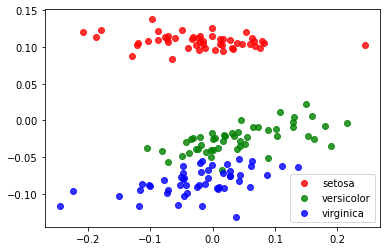

In [48]:
X = iris.data
y = iris.target
ica = FastICA(n_components = 4, random_state=0)
ica_plot = ica.fit(X, y).transform(X)

#plota o gráfico
imprime_grafico_iris(ica_plot, iris.target, iris.target_names)

#### Análise de Fatores

Podemos utilizar a Análise de Fatores para separar as classes.

* Referência: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html

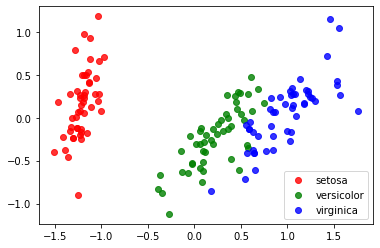

In [18]:
X = iris.data
y = iris.target
factor = FactorAnalysis(n_components = 4, random_state=0)
factor_plot = factor.fit(X, y).transform(X)

#plota o gráfico
imprime_grafico_iris(factor_plot, iris.target, iris.target_names)

#### Isomap

Podemos utilizar o Isomap para separar as classes.

* Referência: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html

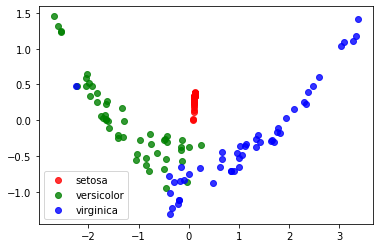

In [19]:
X = iris.data
y = iris.target
isomap = Isomap(n_components=3)
isomap_plot = isomap.fit(X, y).transform(X)

#plota o gráfico
imprime_grafico_iris(isomap_plot, iris.target, iris.target_names)

### Wine Dataset

In [49]:
#carrega a base de dados
wine = load_wine()

In [50]:
#convert os dados em um dataframe pandas
df = pd.DataFrame(data = np.c_[wine['data'], wine['target']], columns = wine['feature_names'] + ['target'])
df['wines'] = pd.Categorical.from_codes(wine.target, wine.target_names)

#imprime algumas amostras, para conhecimento da base de dados
print(df['wines'])

0      class_0
1      class_0
2      class_0
3      class_0
4      class_0
        ...   
173    class_2
174    class_2
175    class_2
176    class_2
177    class_2
Name: wines, Length: 178, dtype: category
Categories (3, object): ['class_0', 'class_1', 'class_2']


In [51]:
#define colunas do dataframe
df.columns = ['alcohol', 'malic_acid', 'ash', 'alcalinity', 
              'magnesium', 'fenois', 'flavanoides', 
              'nao_flavonoides', 'proanthocyanidins', 
              'intensidade_cor', 'hue', 'od280', 'proline',
              'target', 'wine']

In [52]:
#imprime algumas informações do início do dataframe
df.head()

,alcohol,malic_acid,ash,alcalinity,magnesium,fenois,flavanoides,nao_flavonoides,proanthocyanidins,intensidade_cor,hue,od280,proline,target,wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0,class_0


In [24]:
#imprime algumas informações do início do dataframe
df.tail()

,alcohol,malic_acid,ash,alcalinity,magnesium,fenois,flavanoides,nao_flavonoides,proanthocyanidins,intensidade_cor,hue,od280,proline,target,wine
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2.0,class_2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2.0,class_2


In [53]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

kernel = linear


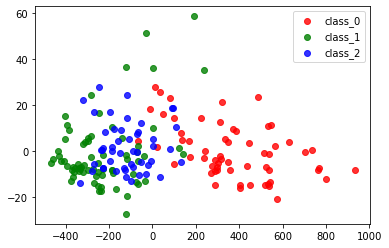

kernel = poly


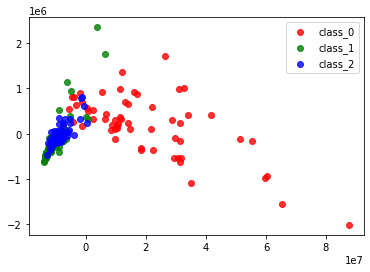

kernel = rbf


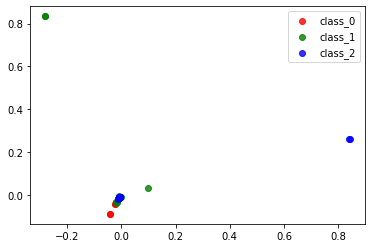

kernel = sigmoid


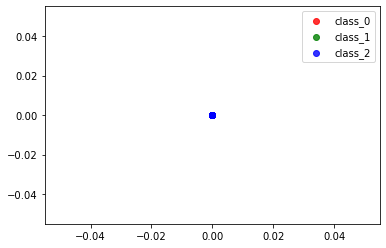

kernel = cosine


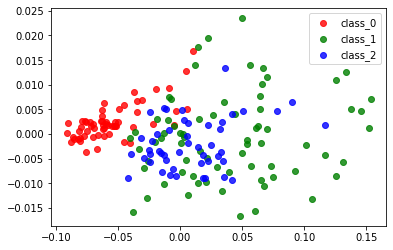

In [57]:
X = wine.data
y = wine.target

for k in ['linear', 'poly', 'rbf', 'sigmoid', 'cosine']:
    kernel = KernelPCA(n_components = 10, kernel = k)
    kernel_plot = kernel.fit(X, y).transform(X)
    
    #plota o gráfico
    print('kernel =', k)
    imprime_grafico_iris(kernel_plot, wine.target, wine.target_names)

#### Análise de Discriminantes Lineares (LDA)

Podemos utilizar a Análise de Discriminantes Lineares (LDA) para separar as classes.

Observe que os resultados do LDA são consideravelmente melhores que os resultados do Kernel PCA, para todos os tipos de Kernel.

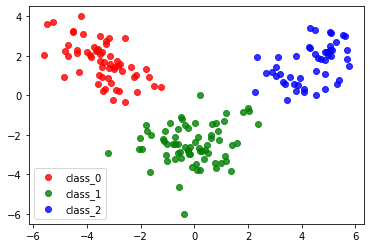

In [58]:
X = wine.data
y = wine.target
lda = LinearDiscriminantAnalysis()
lda_plot = lda.fit(X, y).transform(X)

#plota o gráfico
imprime_grafico_iris(lda_plot, wine.target, wine.target_names)

Esse comportamento pode acontecer para alguns conjuntos de dados, como reportado por Richert & Coelho (2013), no livro

Nas imagens abaixo, os autores apresentam uma condição onde esse tipo de problema ocorre com o PCA e o LDA pode ser utilizado para melhor separação das classes.

Utilizando o Kernel PCA, podemos o seguinte comportamento:

![richert_coelho_01.png](richert_coelho_01.png)
<center>Fonte: Richert & Coelho (2013)</center>

Utilizando o LDA, o resultado apresenta uma melhora considerável:
![richert_coelho_01.png](richert_coelho_02.png)
<center>Fonte: Richert & Coelho (2013)</center>

**Obs.: Não necessariamente, o LDA é melhor que o Kernel PCA (cada método tem suas vantagens e aplicações).**